# Solving Angular Momentum Commutators

In [2]:
from Pysces import *

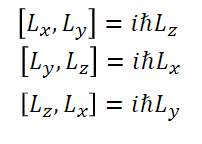

Some helpful information:
    
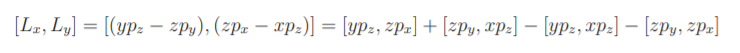

From: http://www.physics.ucc.ie/apeer/PY3102/Angular_momentum.pdf

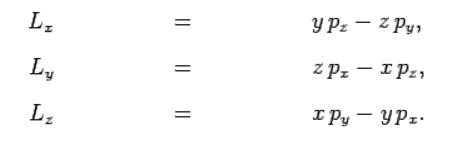

First these operators need to be defined:

In [3]:
L_x = (OP(y)*OP(p_z) - OP(z)*OP(p_y))
L_y = (OP(z)*OP(p_x) - OP(x)*OP(p_z))
L_z = (OP(x)*OP(p_y) - OP(y)*OP(p_x))

display(L_x)
display(L_y)

We're going to do this one similarly to how we did the other example, but it's going to be more complicated.

When we're applying the COMM() function, it is beneficial to also use the factor() function, which will simplify down the commutator.

In [4]:
L_x = (OP(y)*OP(p_z) - OP(z)*OP(p_y))
L_y = (OP(z)*OP(p_x) - OP(x)*OP(p_z))

factor(COMM(L_x, L_y, f(x)))

In [5]:
Lx_Ly()

Note that when two operators in the functions are the same, like how "z" is common in: [z*p_x, z*p_y], the commutator = 0

You can delete these terms. 

Therefore, the function simplifies to: [y*p_z, z*p_x] + [z*p_y, x*p_y]

In [6]:
# [x*p_z, z*p_y] + [y*p_z, z*p_x]

In [7]:
# And we know that L_z = y*p_x - x*p_y
#               [p_z, z] = -I*h_b    <--- double check
#                [z, p_z] = I*h_b   <--- double check
# The answer is L_z*i*h_b

Let's try:

[L_x, L_y]

First, let's see what it looks like:

In [8]:
display(Commutator(L_x, L_y))

Let's use the expand_COMM_1() function on both terms:

Reminder of what this function does:



expand_COMM_1(x, y, y_2) = Commutator(x, y) - Commutator(x, y_2)

Where x = the first operator, in this case L_x, 

y = the first term of the second operator, in this case (-x*p_z)

and

y_2 = the second term of the second operator, in this case (z*p_x)

This process can be thought of as "distributing" the commutators.

In [9]:
expand_COMM_1(OP(y)*OP(p_z), -OP(x)*OP(p_z), OP(z)*OP(p_x)) + expand_COMM_1(OP(z)*OP(p_y), -OP(x)*OP(p_z), OP(z)*OP(p_x))

There are some interesting characteristics from this distribution...

The first and fourth commutators are both equal to zero.

This is due to the repetition of terms.

For example, the first term, both operators have p_z, so the commutator = 0

For the last term, both operators have z, so the commutator = 0

By copying and pasting the print() form of the above commutator, these terms can be deleted manually, leading to:

This needs to be turned back into commutators that python can read:

In [10]:
Commutator(OP(x)*OP(p_z), OP(z)*OP(p_y)) - Commutator(OP(y)*OP(p_z), OP(z)*OP(p_x))

The function expand_COMM_2() can then be used.

This function is defined as: expand_COMM_2(a, b, c, d) = a*d*Commutator(b, c)

Where a is the first variable of the first operator in the commutator, b is the second, c is the first variable in the second operator in the commutator, d is the second.

For example:

for the first commutator,

a = OP(x)
b = OP(p_z)
c = OP(z)
d = OP(p_y)

This function is used when the first and fourth terms can be removed.

In this case, they can be removed because the c and d terms are both with respect to z

It is important to note that if the a and d terms are both with respect to the same variable, the function:

expand_COMM_3()

should be used instead to remove the extra terms.

In [11]:
expand_COMM_2(OP(x), OP(p_z), OP(z), OP(p_y)) - expand_COMM_2(OP(y), OP(p_z), OP(z), OP(p_x))

This answer can then be simplified by using the factor() function.

Note that this can all be done in one step.

In [12]:
factor(expand_COMM_2(OP(x), OP(p_z), OP(z), OP(p_y)) - expand_COMM_2(OP(y), OP(p_z), OP(z), OP(p_x)))

Now, we can compare the left term,

(x*p_y - y*p_x) 

with the identities listed at the top, and can notice that this is the same as the L_z operator.

Now we can look at the second term, [p_z, z] :

This can be solved like the [x, p_x] example in the Operators python file:

This can be simplified with the COMM() function.

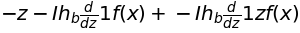

In [13]:
COMM(p_OP(z), OP(z), f(x))

In [14]:
print(-z*-I*h_b*Derivative(f(z), z) - I*h_b*Prod_Rule_Sp(z, f(z), z))

I*h_b*z*Derivative(f(z), z) - I*h_b*(z*Derivative(f(z), z) + f(z))


In [15]:
l = expand(I*h_b*z*Derivative(f(z), z) - I*h_b*(z*Derivative(f(z), z) + f(z)))

l

All together, [L_x, L_y] =

In [16]:
L_z, L_y, L_x = symbols("L_z L_y L_x")

Operator(L_z)*(-I*h_b)

Keep in mind that the f(z) is an auxillary function.